1. Import data and Preparation

In [3]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#read data
df = pd.read_csv(r"D:\Hoctap\PersonalProject\LifestyleandWellbeing\data\Wellbeing_and_lifestyle_data_Kaggle.csv")
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [5]:
#get dataset columns
cols = df.columns.to_list()
cols

['Timestamp',
 'FRUITS_VEGGIES',
 'DAILY_STRESS',
 'PLACES_VISITED',
 'CORE_CIRCLE',
 'SUPPORTING_OTHERS',
 'SOCIAL_NETWORK',
 'ACHIEVEMENT',
 'DONATION',
 'BMI_RANGE',
 'TODO_COMPLETED',
 'FLOW',
 'DAILY_STEPS',
 'LIVE_VISION',
 'SLEEP_HOURS',
 'LOST_VACATION',
 'DAILY_SHOUTING',
 'SUFFICIENT_INCOME',
 'PERSONAL_AWARDS',
 'TIME_FOR_PASSION',
 'WEEKLY_MEDITATION',
 'AGE',
 'GENDER',
 'WORK_LIFE_BALANCE_SCORE']

In [6]:
df["AGE"].value_counts() #age type and value
df["AGE"] = df["AGE"].replace("Less than 20", "20 or less") #replace age group: Less than 20 to 20 or less

In [19]:
desc = df.describe().round(2) #descriptive statistics with round 2 number after the dot
desc = desc.reset_index() #change desc index from descriptive variables to ascending value
desc_value = desc["index"].to_list() #create a list inclue all descriptive value
desc = desc.drop(columns=["index"]) #drop index column
desc

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
0,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00
1,2.92,5.23,5.51,5.62,6.47,4.00,2.72,1.41,5.75,3.19,5.70,3.75,7.04,2.90,2.93,1.73,5.71,3.33,6.23,666.75
2,1.44,3.31,2.84,3.24,3.09,2.76,1.85,0.49,2.62,2.36,2.89,3.23,1.20,3.69,2.68,0.44,3.09,2.73,3.02,45.02
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,480.00
4,2.00,2.00,3.00,3.00,4.00,2.00,1.00,1.00,4.00,1.00,3.00,1.00,6.00,0.00,1.00,1.00,3.00,1.00,4.00,636.00
5,3.00,5.00,5.00,5.00,6.00,3.00,3.00,1.00,6.00,3.00,5.00,3.00,7.00,0.00,2.00,2.00,5.00,3.00,7.00,667.70
6,4.00,8.00,8.00,10.00,10.00,6.00,5.00,2.00,8.00,5.00,8.00,5.00,8.00,5.00,4.00,2.00,9.00,5.00,10.00,698.50
7,5.00,10.00,10.00,10.00,10.00,10.00,5.00,2.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,2.00,10.00,10.00,10.00,820.20


In [25]:
fr = desc["FRUITS_VEGGIES"].to_list()
fr

[15972.0, 2.92, 1.44, 0.0, 2.0, 3.0, 4.0, 5.0]

In [17]:
desc_rs = pd.DataFrame(columns=desc_value)
desc_rs

,count,mean,std,min,25%,50%,75%,max


In [26]:
for col in cols:
    desc_rs.append(desc[col].to_list())

desc_rs
#for val in desc[col]:

KeyError: 'Timestamp'

In [46]:
pivoted = desc.pivot(index="index", columns=cols, values=desc)

KeyError: 'Timestamp'

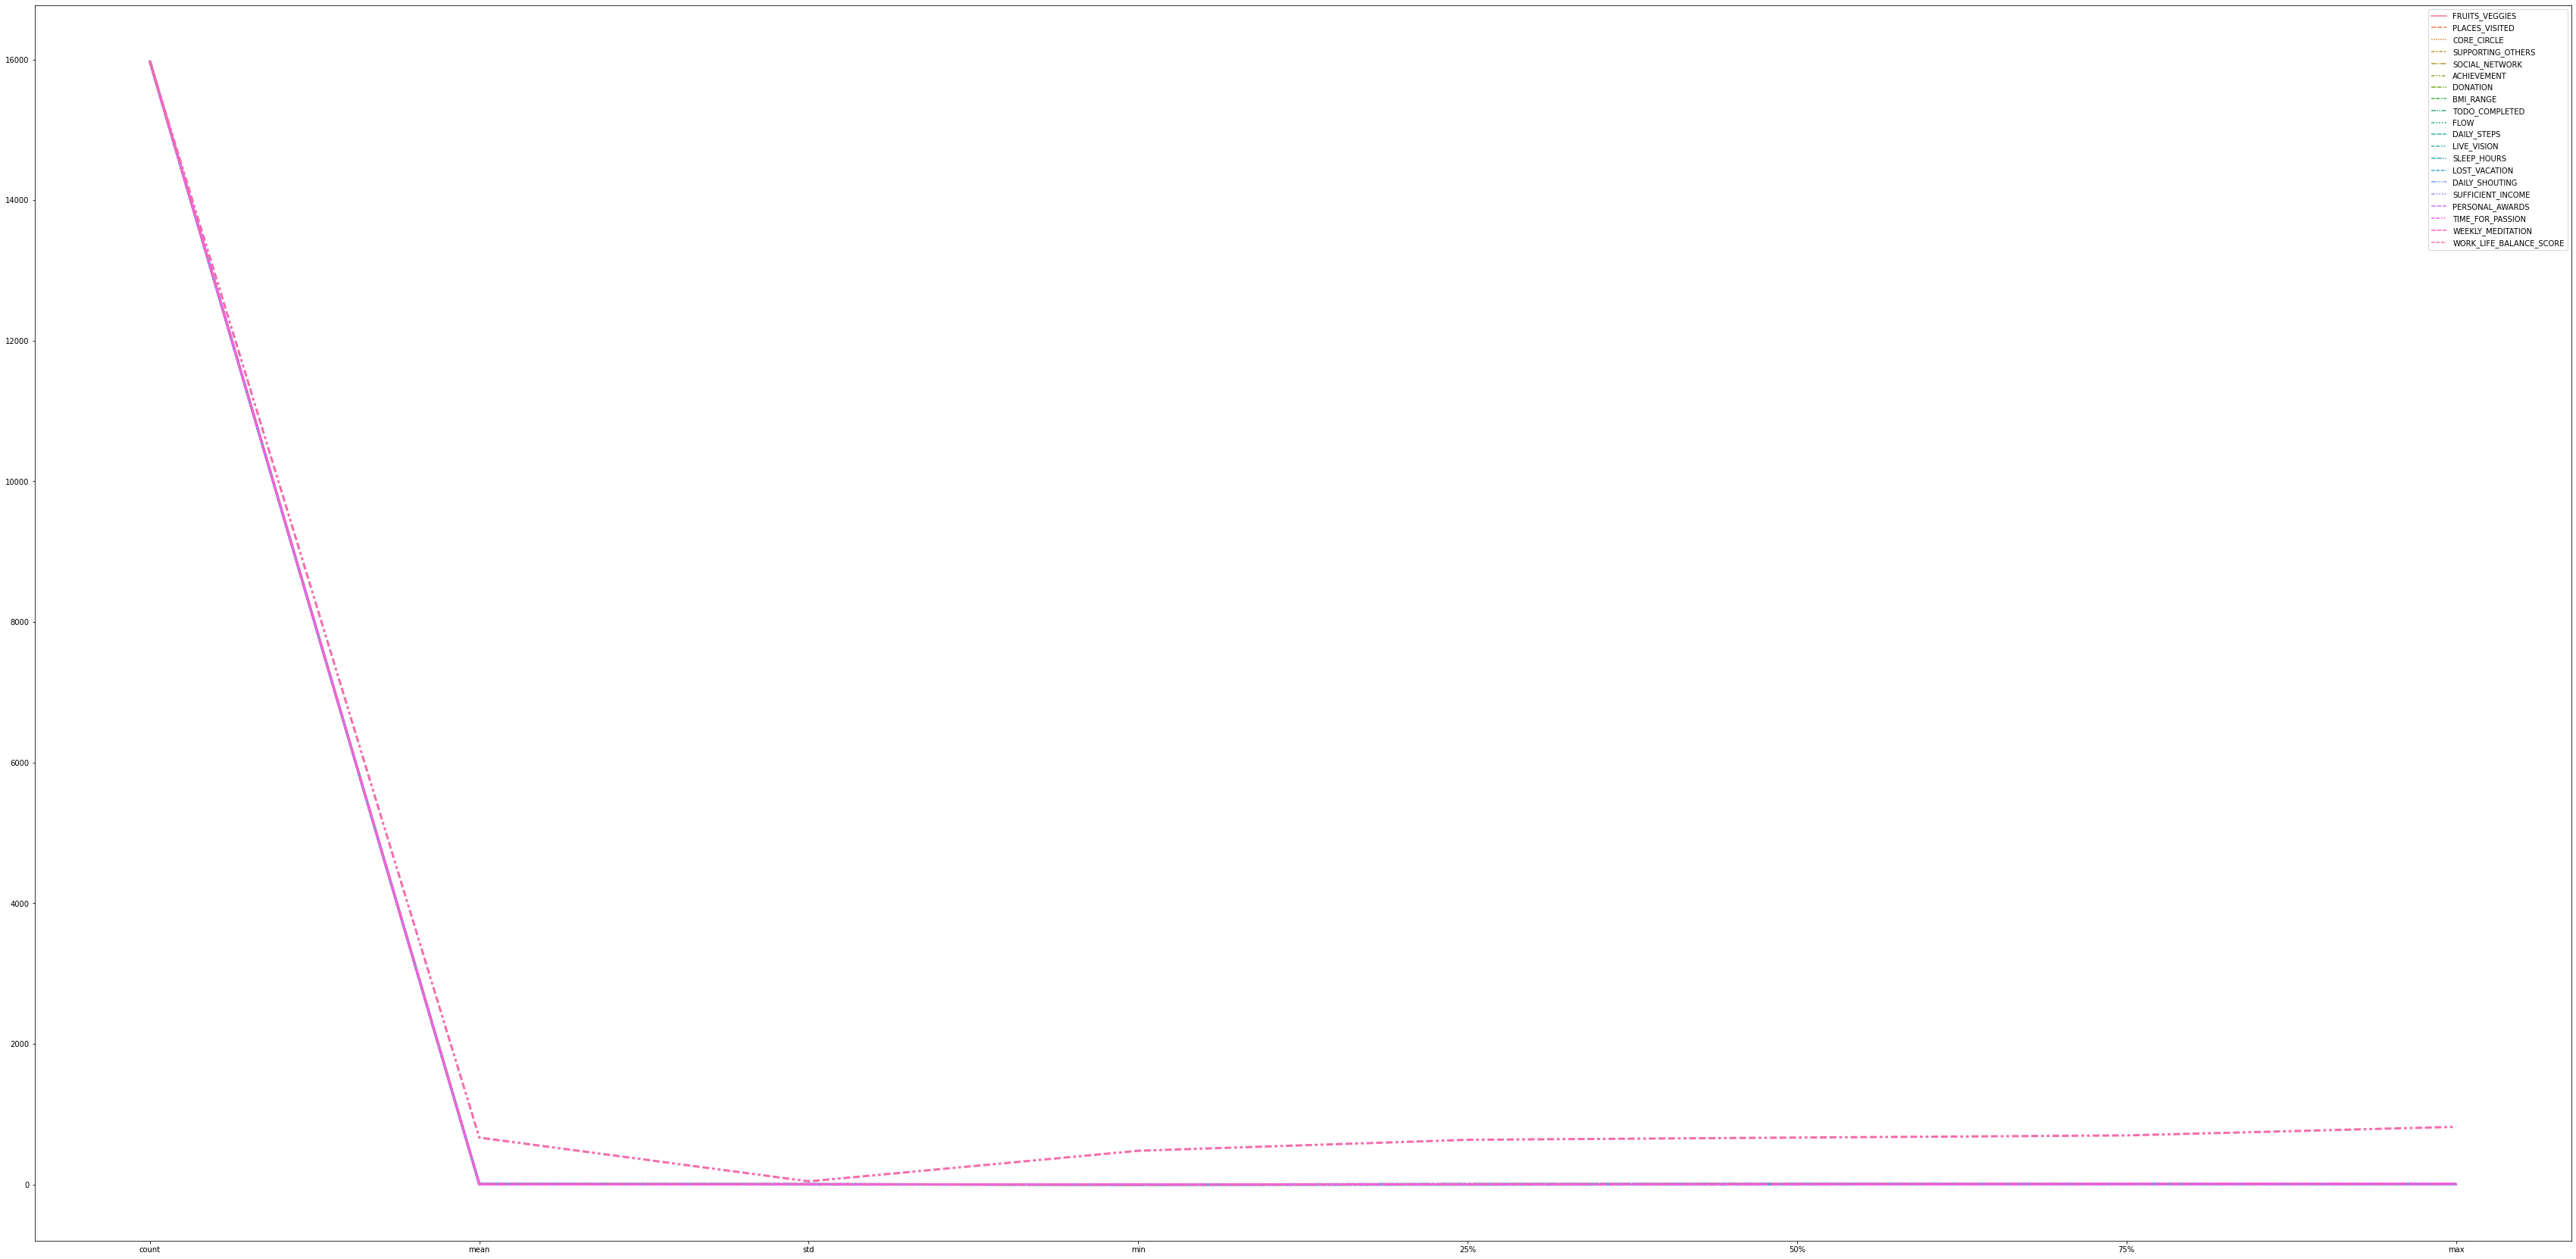

In [37]:
plt.figure(figsize=(60, 0))
sns.lineplot(data=desc, linewidth=3)
plt.show()

TypeError: cannot unpack non-iterable Figure object

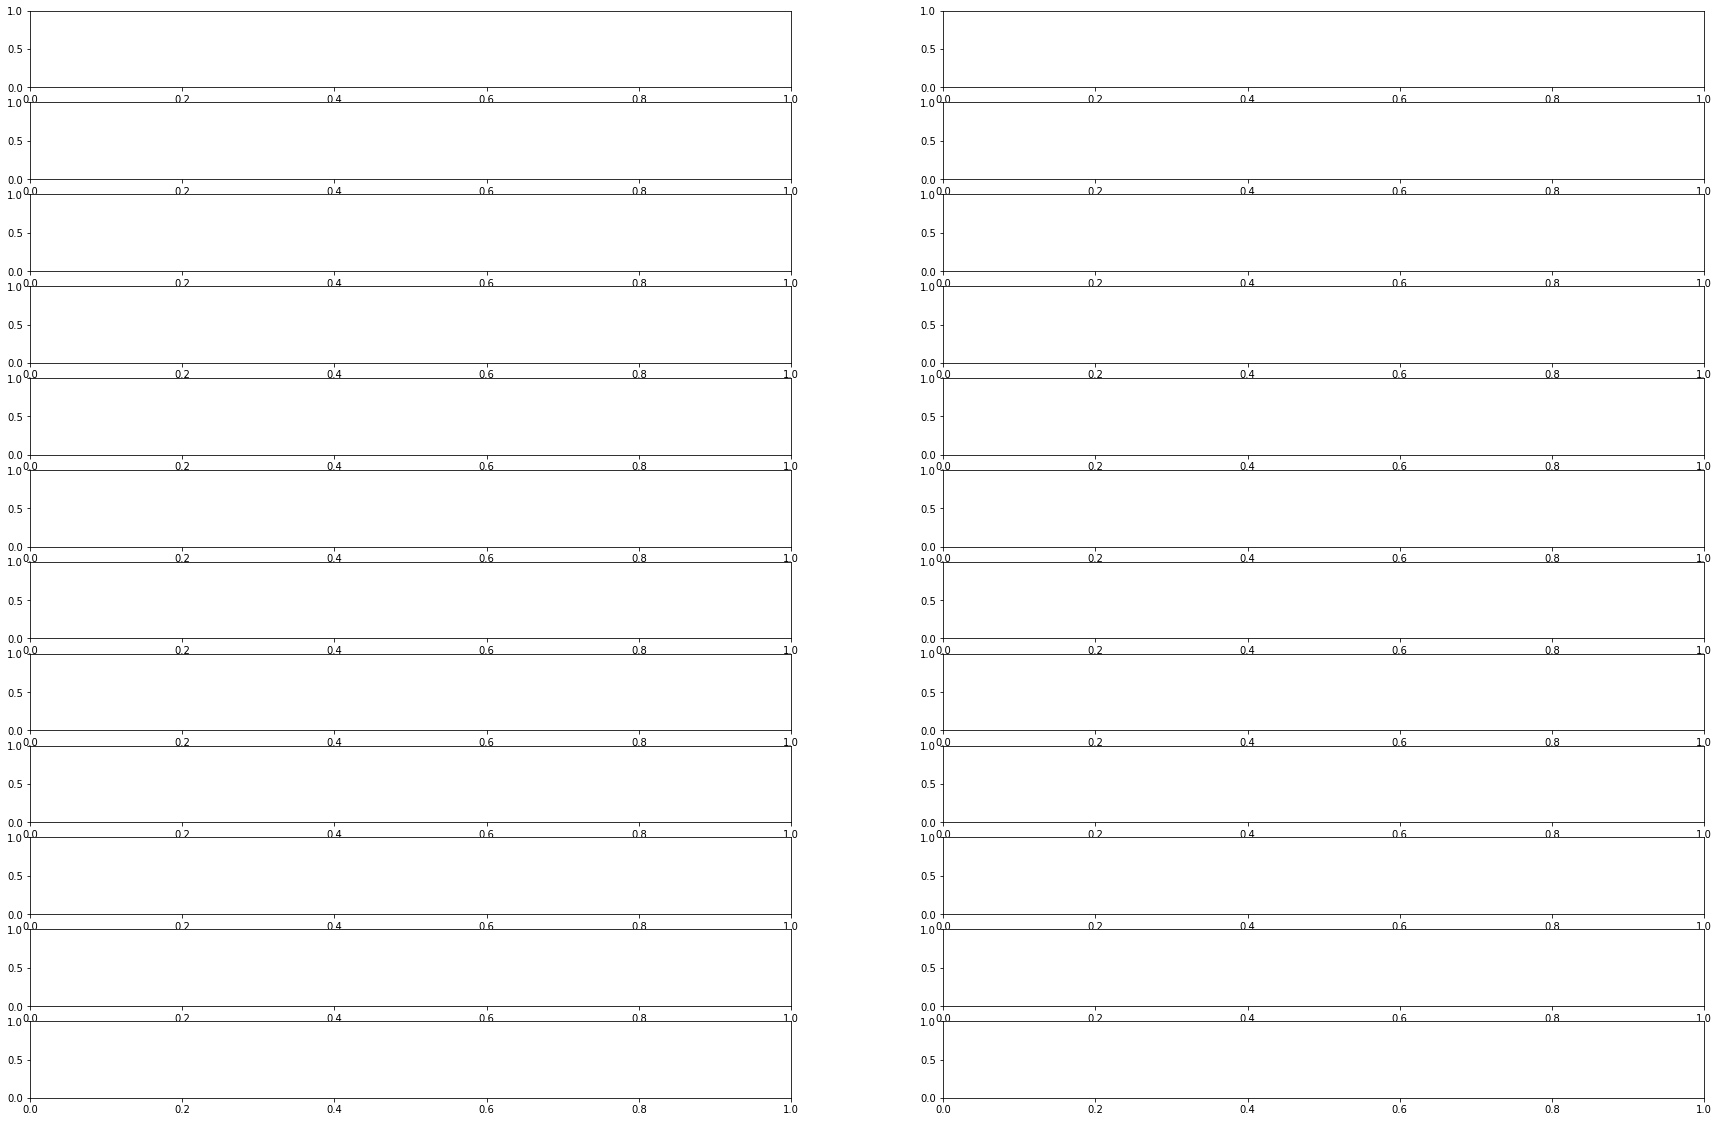

In [35]:
desc = df.describe().round(2) #descriptive statistics with round 2 number after the dot
fig, axs = plt.subplots(nrows=int(len(cols)/2), ncols=2, figsize=(30, 20)) #subplot with (row=number of column/2), (col=2) and size of each plot=(30,20)
for f,ax in fig,axs:
    for col in cols:
        desc[col].plot(kind='barh', figsize=(14,24), title=col, ax=ax[f, ax], fontsize=14)   
plt.show() #show plot

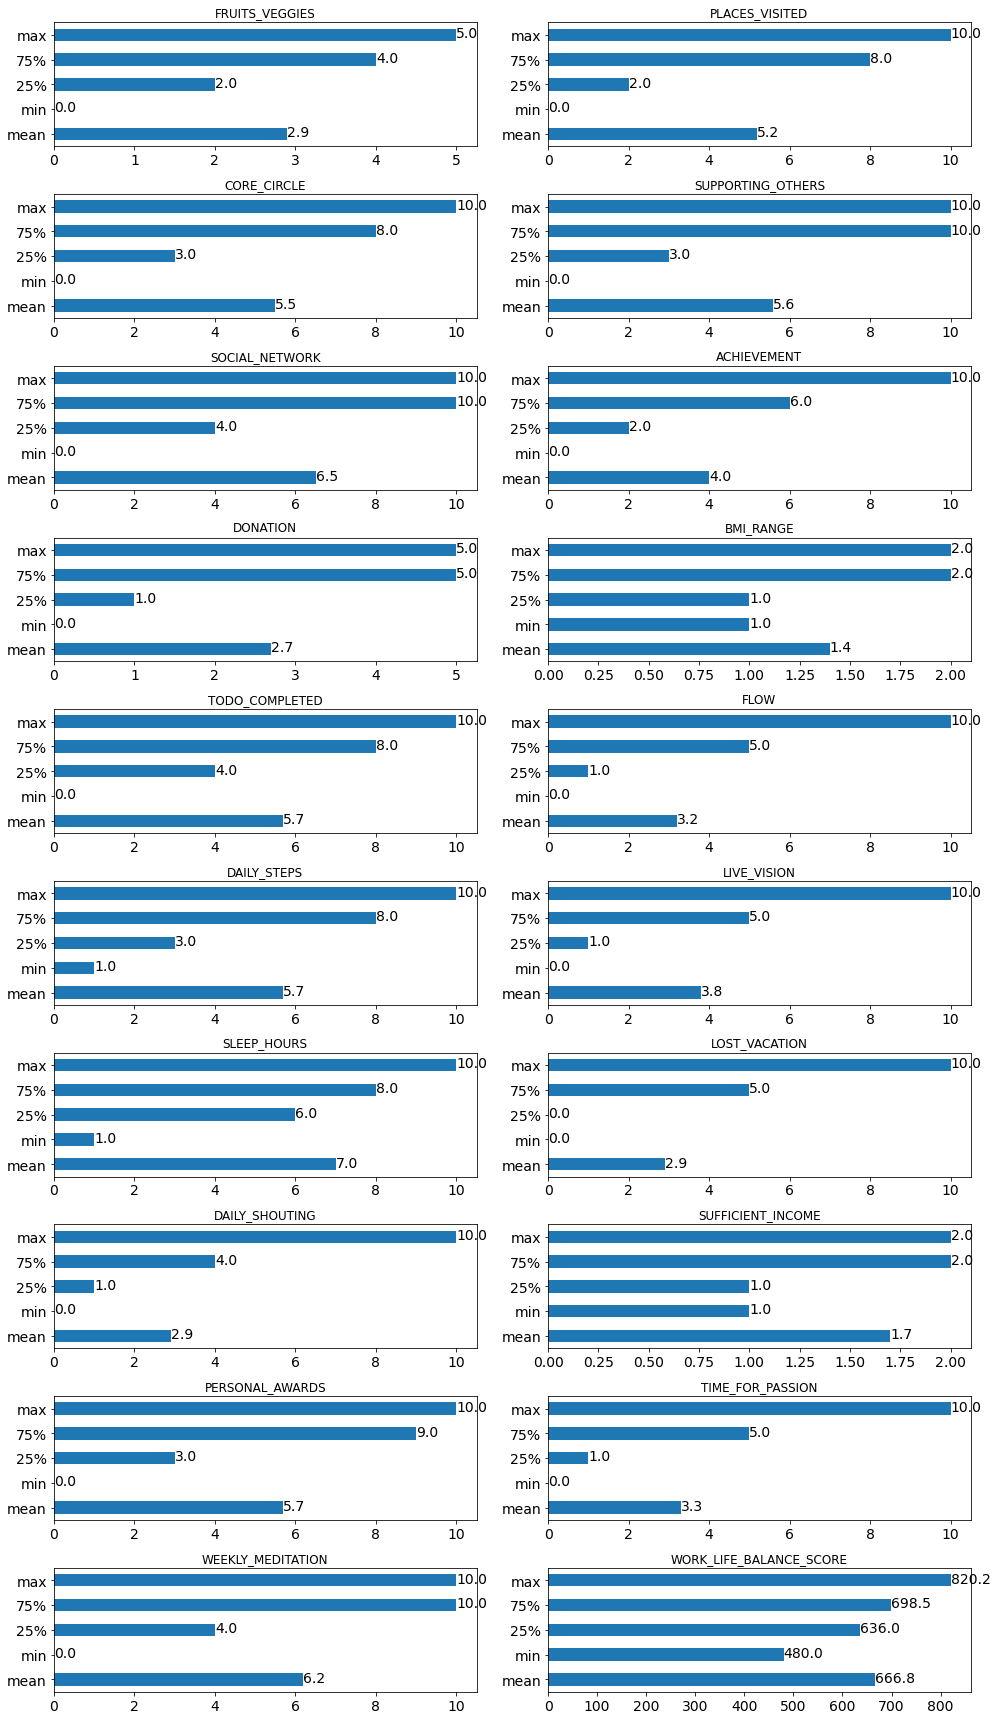

In [7]:
def descriptive(df):
    desc=df.describe().round(1).drop({'count', 'std', '50%'}, axis=0)
    i=-0.1
    j=0
    Row = int(round(len(desc.columns.tolist())/2+0.1))
    f,ax = plt.subplots(Row,2, figsize=(28,18))
    for name in desc.columns.tolist():
        desc[name].plot(kind='barh', figsize=(14,24), title=name, ax=ax[round(i), j], fontsize=14)
        for k, v in enumerate(desc[name].tolist()):
            ax[round(i), j].text(v, k-0.1, str(v), color='black', size = 14)
        i +=0.5
        if j==0: j=1
        else: j=0
    f.tight_layout()
descriptive(df)